In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

sns.set_style("darkgrid")

In [109]:
df = pd.read_csv(Path("../out/data/pca-test.csv"), index_col=0)
df.head()

,global_round,endpoint,train_loss,pca_kind,pca_x,pca_y,is_malicious,pred
0,0,10,0.401264,KernelPCA,0.221763,-0.029802,False,-1
1,0,13,1.186034,KernelPCA,-0.270250,-0.003776,False,1
2,0,4,1.630984,KernelPCA,-0.317417,0.002417,False,-1
3,0,19,0.862158,KernelPCA,-0.052415,0.026394,False,-1
4,0,18,0.514082,KernelPCA,0.009476,0.021233,False,1


/opt/anaconda3/envs/diff-sec-fl/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


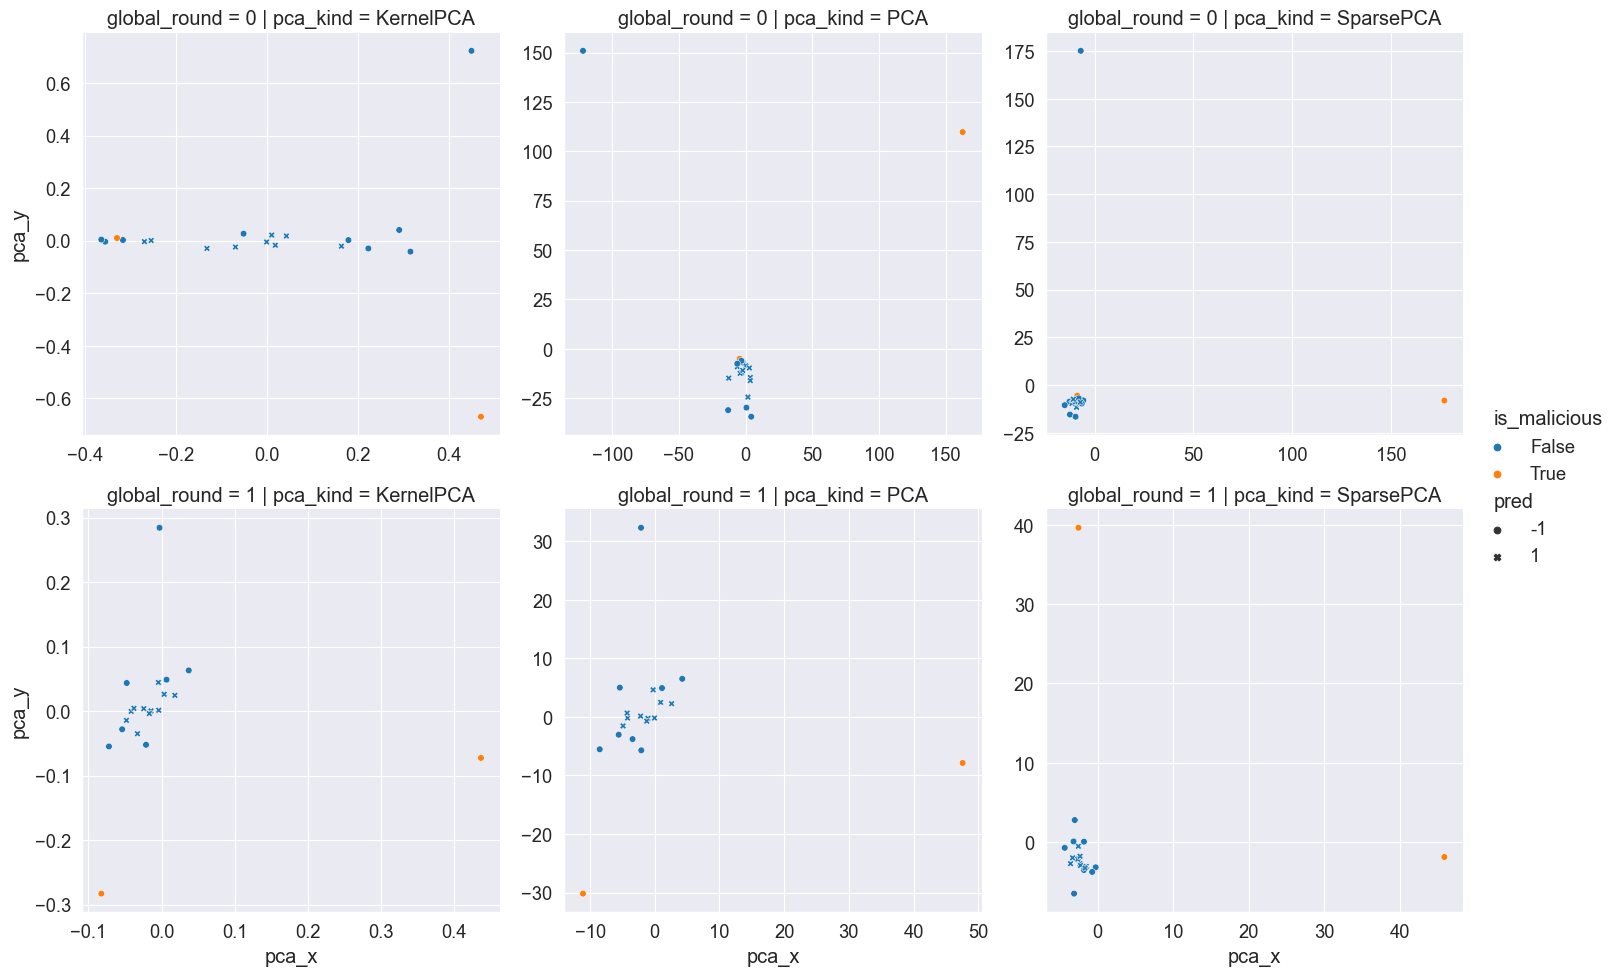

In [110]:
with sns.plotting_context("paper", font_scale=1.5):
    sns.relplot(
        df,
        kind="scatter",
        x="pca_x",
        y="pca_y",
        row="global_round",
        col="pca_kind",
        hue="is_malicious",
        style="pred",
        facet_kws=dict(sharex=False, sharey=False)
    )
    plt.show()

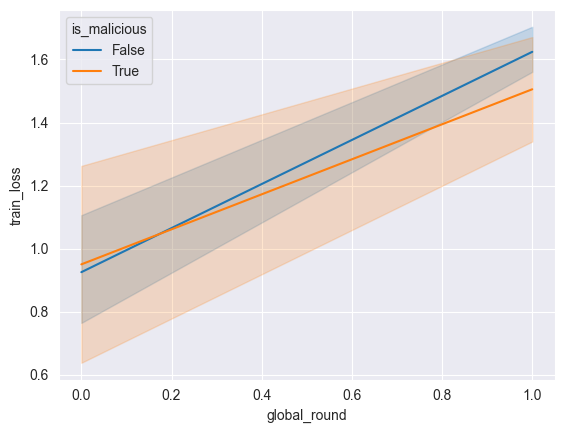

In [111]:
sns.lineplot(df, x="global_round", y="train_loss", hue="is_malicious")
plt.show()